# 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\kamil\Documents\Instacart Basket Analysis'

In [3]:
complete_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
complete_data.shape

(32404859, 35)

In [5]:
complete_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,0,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

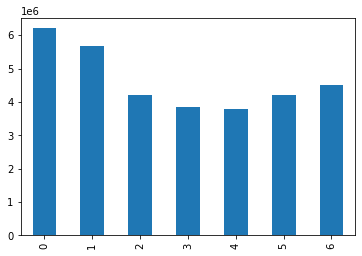

In [6]:
bar = complete_data['order_dow'].value_counts().sort_index().plot.bar()

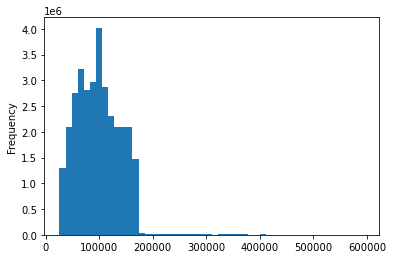

In [7]:
hist = complete_data['income'].plot.hist(bins=50)

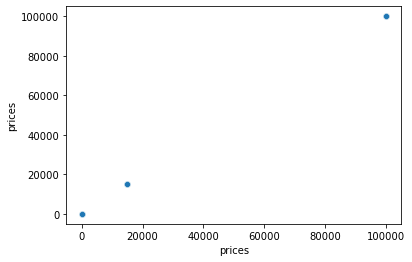

In [8]:
scatter = sns.scatterplot(x = 'prices', y = 'prices', data = complete_data)

In [9]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)

In [10]:
dev = np.random.rand(len(complete_data)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
# Store 70% of the sample in data frame big
big = complete_data[dev]

In [13]:
# Store 30% of the sample in data frame small
small = complete_data[~dev]

In [14]:
# Checking length if it is correct
len(big)+len(small)

32404859

In [15]:
# Creating new data frame with just the columns needed for the line chart
df_small = small[['order_dow','prices']]

In [16]:
df_small 

,order_dow,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


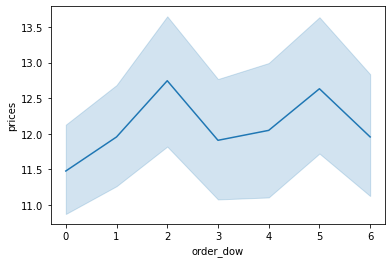

In [17]:
# Create line chart on 30% of df sample
line = sns.lineplot(data = df_small, x = 'order_dow',y = 'prices')

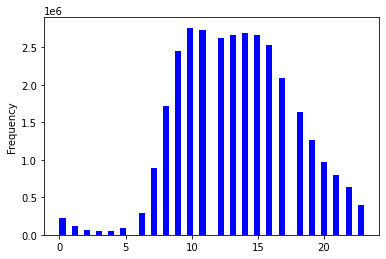

In [18]:
hist2 = complete_data['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

Most of the orders are placed between 10-15 h. After 19 h the number of orders is decreased significantly

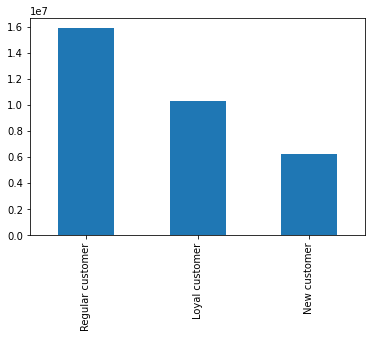

In [19]:
# Create a bar chart from the “loyalty_flag” column.
bar2 = complete_data['loyalty_flag'].value_counts().plot.bar()

The bigest customer base is classed as regular customers.

# 3. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [20]:
df_small_2 = small[['order_hour_of_day','prices']]

In [21]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


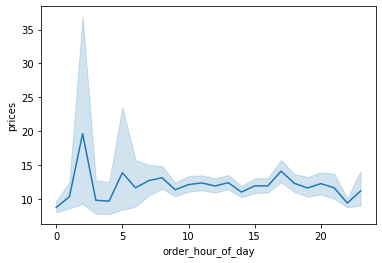

In [22]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

# 4. Determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
# Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['age','no_of_dependants']]

In [24]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


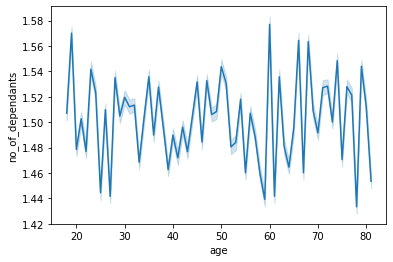

In [25]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

In [26]:
df_small_3['no_of_dependants'].describe()

count    9.721098e+06
mean     1.502105e+00
std      1.118703e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

There is no clear trend or connection between age and number of dependents for Instacart customers.


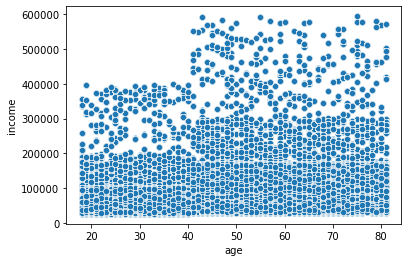

In [27]:
scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = complete_data)

The scatterplot shows the relationship between age and sincome. It could be seen that:
    1. The customers aged 20-40 have income up to 200 000 USD
    2. For customers aged above 40 years income raises to 300 000 USD
    3. The spending power of instacart customers is higher within the 40+ age group, reaching 600,000 USD.
    4. Some of the customers aged below 40 have a higher spending power than the majority of 40 + group

    



# 5. Export

In [28]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_4_9.png'))

In [29]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_4_9.png'))

In [30]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_4_9.png'))

In [31]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_4_9.png'))

In [32]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist2_4_9.png'))

In [33]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar2_4_9.png'))

In [35]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line2_4_9.png'))

In [36]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line3_4_9.png'))

In [38]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter2_4_9.png'))